<a href="https://colab.research.google.com/github/RISHAV1985/First-ML-model/blob/main/Linear_Regression_and_Random_Forest_Regressor_model_on_Solubility_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# First ML model
# Importing IRIS dataset 
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df



,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [3]:
X=df.drop(['logS'],axis=1) # Assigning variables to X, here we assigned first 4 cloumns to X by droping last column
Y=df.iloc[:,-1]  # Assigning last column to variables Y 
# Y= df['logS'] Alternative way to assigning last column to varisble Y
# Y=df.logS Alternative way to assigning last column to varisble Y

In [4]:
# Splitting datasets into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


In [5]:
!pip install scikit-learn

In [6]:
# Building the model for prediction using the linear regression method
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [7]:
# Training and testing the model by prediction 
y_lr_train_pred=lr.predict(X_train)
y_lr_test_pred=lr.predict(X_test)

In [8]:
# Checking model performance
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(Y_train, y_lr_train_pred)
lr_train_r2 = r2_score(Y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(Y_test, y_lr_test_pred)
lr_test_r2 = r2_score(Y_test, y_lr_test_pred)

In [9]:
print(lr_train_mse)
print(lr_train_r2)

1.0139894491573003
0.7695127746587307


In [10]:
print(lr_test_mse)
print(lr_test_r2)

0.9990844407075306
0.7705650058569232


In [12]:
lr_results = pd.DataFrame(['Linear regression',lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.013989,0.769513,0.999084,0.770565


In [15]:
# Using Random forest model 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=42)
rf.fit(X_train,Y_train)

RandomForestRegressor(max_depth=2, random_state=42)

In [16]:
# Apply model and make prediction on training set and test set
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [17]:
# Checking peformance of model via Random Forest Regressor using Mean squared error and r2 score
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(Y_train, y_rf_train_pred)
rf_train_r2 = r2_score(Y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(Y_test, y_rf_test_pred)
rf_test_r2 = r2_score(Y_test, y_rf_test_pred)

In [19]:
# Performance of model
rf_results = pd.DataFrame(['Random forest',rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,1.050251,0.76127,1.046995,0.759562


In [20]:
# Combining the results of linear regression model and random forest regressor
# comparing both performances
pd.concat([lr_results,rf_results])

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.013989,0.769513,0.999084,0.770565
0,Random forest,1.050251,0.76127,1.046995,0.759562


Text(0.5, 1.0, 'Random Forest Regressor')

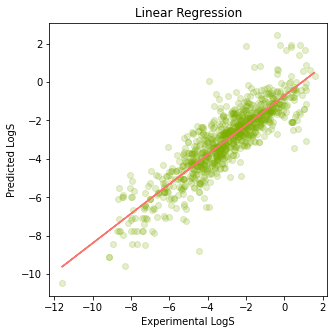

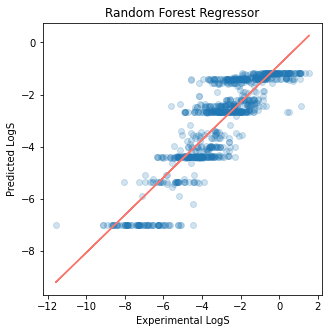

In [42]:
# Data visulisation using graphs 
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,5))
plt.scatter(x=Y_train, y=y_lr_train_pred,c="#7CAE00",alpha=0.2)
z = np.polyfit(Y_train, y_lr_train_pred, 1)
p = np.poly1d(z)
plt.plot(Y_train,p(Y_train),"#F8766D")
plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')
plt.title("Linear Regression")
plt.tight_layout(pad=2.0)

plt.figure(figsize=(5,5))
plt.scatter(x=Y_train, y=y_rf_train_pred,alpha=0.2)
z = np.polyfit(Y_train, y_rf_train_pred, 1)
p = np.poly1d(z)
plt.plot(Y_train,p(Y_train),"#F8766D")
plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')
plt.title("Random Forest Regressor")